## 선형 판별분석과 이차 판별분석(분류모델)
통계기반의 데이터 분류 모델

### 판별분석 
1) 종속변수 : 질적척도 
- 범주가 2개 = 일반 판별분석 혹은 두 집단 판별분석
- 범주가 3개 이상 = 다중 판별분석
- 범주를 구분하는 결정경계선을 산출하는 방식에는 `선형판별분석(LDA)` 와 `이차판별분석(QDA)`으로 구분

2) 독립변수 : 최소 제곱법-> 최적의 가중치 구한다. & 정규분포를 따르지 않아도 괜찮음.

3) 판별분석은 독립변수들 간의 조합을 통해 최적의 분류식을 만드는 방식이기 때문에 모든 독립변수를 넣는 것보다는 분류에 유의미한 변수를 선택하여 모델을 만드는 것이 좋다. (회귀분석과 같이 전진선택법, 후진제거법, 단계적 선택법 등의 변수선택방법을 사용하여 모델의 성능을 향상시킬 수 있다.)

### 선형 판별분석
- 목적 : 분류, 차원축소(PCA:비지도학습, 선형 판별분석:지도학습)

- 기본 원리 : 종속변수의 범주 간 분별 정보를 최대한 유지시키면서 차원을 축소시키는 방식으로 데이터의 오분률이 최소가 되는 축을 찾는다. 

- 방법 : 전체 범주의 분류 오차를 최소화하는 선형 판별점수를 도출한 뒤 모든 관측치의 분류점수를 도출. -> 분류점수를 통해 해당 관측치가 어느 범주에 속할 것인지를 예측할 수 있다. 즉, 집단 내 분산에 비해 집단 간 분산의 차이를 최대화하는 `독립변수의 함수`를 찾는 것. (ANOVA와 관련)

- 수식 : $Z = a_0(판별상수) + a_1(판별계수)X_1 +...+ a_k(판별계수)X_k$ 

-> 각 범주에 대한 선형 판별함수가 도출되며, 관측치에 대하여 각 범주별 분류점수를 계산. 그 다음 가장 큰 분류점수를 갖는 범주로 관측치를 분류해준다.

-> 예시를 통해 본 분류점수 계산하는 방법

|선형판별분석|
|변수|자동차보유|자동차미보유|
|---|---|---|
|constant|-118.53|-167.86|
|연령|1.65|0.42|
|연수익|0.036|0.016|

|오분류비율|
||자동차보유|자동차미보유|Total|
|--|---|---|---|
|Rate|0.25|0.07|0.18|


Constant = 선형 판별분석의 상수

if, A라는 사람이 30세에 연수익 3000만원 이라면, <br>
자동차 보유 범주에 대한 분류점수: z=-118.53+1.65X30+0.036X3000=38.97 <br>
자동차 미보유 범주에 대한 분류점수: z=-167.86+0.42X30+0.016X3000=5.34 <br>
자동차 보유 점수가 미보유 점수보다 높기 때문에, A는 자동차보유 범주로 분류된다.

그리고 자동차 보유와 미보유 범주 분류에 대한 오분류 비율 확인하기 => 모델의 정확도 평가(Eigenvalue고유값 사용) *고유값: 집단 간 차이의 제곱합을 집단 내 차이의 제곱합으로 나누어 계산(집단 간 차이 제곱합이 클수록(=분산이 클수록), 집단 내 차이 제곱합이 작을수록(=분산이 작을수록) 고유값 커짐(설명력이 높다)). 일반적으로 고유값이 4.0이상이면 설명력이 있다고 판단


- 조건 1) 데이터가 정규분포 2) 각각의 범주들은 동일한 공분산 행렬 3) 독립변수들은 통계적으로 상호독립적

-> (3) 조건이 충족되지 않을 경우 이차 판별분석 방법 사용


### 이차 판별분석
- 이차 판별분석은 선형 판별분석이 공분산 구조가 많이 다른 범주의 데이터를 잘 분류하지 못한다는 단점으로 보완한 방법. (= 범주 간의 공분산 구조가 다를때 이차 판별분석 사용.)

- 이차 판별분석은 비선형 분류가 가능하다는 장점이 있지만 독립변수가 많을 경우 추정해야 하는 모수가 많아져서 선형 판별분석에 비해 연산량이 큰 단점이 있다.

- 오분류 기대비용(이게 몽미..?ㅎ)



## 실습 : 신체정보로 성별을 분류하는 모델 만들기

1. 패키지 임포트

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #선형판별분석
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis #이차판별분석
from sklearn.metrics import classification_report # 


2. 데이터 불러오기 및 확인

In [2]:
df = pd.read_csv('./datasets/bodyPerformance.csv')
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


3. 키와 몸무게에 따른 성별 분포 시각화

C:\Users\hanjieun_2\AppData\Local\Temp\ipykernel_6164\3545173256.py:10: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  ax = sb.kdeplot(x=df_man.height_cm, y=df_man.weight_kg, cmap='Blues', shade=False, shade_lowest=False, cbar=False)
C:\Users\hanjieun_2\AppData\Local\Temp\ipykernel_6164\3545173256.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sb.kdeplot(x=df_man.height_cm, y=df_man.weight_kg, cmap='Blues', shade=False, shade_lowest=False, cbar=False)
C:\Users\hanjieun_2\AppData\Local\Temp\ipykernel_6164\3545173256.py:11: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  ax = sb.kdeplot(x=df_woman.height_cm, y=df_woman.weight_kg, cmap='Reds', shade=Fa

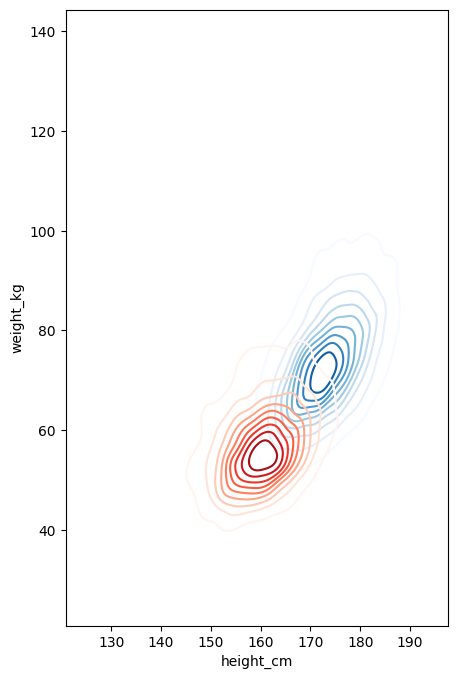

In [5]:
# 성별 구분 데이터셋 생성
df_man = df.loc[df['gender']=='M']
df_woman = df.loc[df['gender']=='F']

# 그래프 설정
f,ax = plt.subplots(figsize=(10,8))
ax.set_aspect('equal')

# 가로길이, 세로길이 변수 축 설정
ax = sb.kdeplot(x=df_man.height_cm, y=df_man.weight_kg, cmap='Blues', shade=False, shade_lowest=False, cbar=False)
ax = sb.kdeplot(x=df_woman.height_cm, y=df_woman.weight_kg, cmap='Reds', shade=False, shade_lowest=False)

red = sb.color_palette('Reds')[-2]
blue = sb.color_palette('Blues')[-2]

> ax.set_aspect 파라미터
- 'auto': fill the position rectangle with data.
- 'equal': same as aspect=1, i.e. same scaling for x and y.

> 독립변수 height_cm, weight_kg 칼럼의 수치에 따라 남성과 여성의 분포 확인가능

> 남성은 175cm,70kg 에 주로 분포 + 여성은 160cm,55kg에 주로 분포

> 일부공간은 성별이 겹쳐있는 것을 알 수 있다.

4. 독립변수 정규화 스케일링

In [7]:
# 독립변수. 종속변수 분리
df_x = df.drop(['gender', 'age', 'class'], axis=1) #age, class는 중요하지 않으니까 삭제
df_y = df[['gender']]

# 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df_x)

# 컬럼명 결합
df_x = pd.DataFrame(data=df_minmax, columns=df_x.columns)
df_x.head()

,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,0.687500,0.437746,0.242706,0.512164,0.646766,0.778723,0.182353,0.7500,0.716172
1,0.581395,0.263864,0.168435,0.492958,0.626866,0.516312,0.173529,0.6625,0.755776
2,0.793605,0.462433,0.226790,0.588988,0.756219,0.635461,0.155462,0.6125,0.597360
3,0.719477,0.400716,0.204244,0.486556,0.731343,0.587234,0.168908,0.6625,0.722772
4,0.709302,0.370304,0.187003,0.448143,0.631841,0.617021,0.218908,0.5625,0.716172


5. 학습셋과 테스트셋 분리

In [8]:
# 학습셋과 테스트셋 분리하여 생성(7:3)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=10)

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수:', len(x_train))
print('test data 개수:', len(x_test))

train data 개수: 9375
test data 개수: 4018


6. 선형 판별모델 모델 적용

In [9]:
# 모델 생성
LDA_1 = LinearDiscriminantAnalysis(store_covariance=True)

# LDA 적합(훈련시키기)
LDA_1.fit(x_train, y_train) 

# 예측값 생성
y_train_pred = LDA_1.predict(x_train)
y_test_pred = LDA_1.predict(x_test)

# 모델 평가(정확도)
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9784533333333333
0.9810851169736187


c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> store_covariancebool, default=False

If True, explicitly compute the weighted within-class covariance matrix when solver is ‘svd’. The matrix is always computed and stored for the other solvers.

True인경우 solver ='svd'일때 가중치가 있는 클래스 내 공분산 행렬을 명시적으로 계산. 행렬은 항상 다른 solver에 대해 계산되고 저장.

> solver : {‘svd’, ‘lsqr’, ‘eigen’}, default=’svd’

Solver to use, possible values:
‘svd’: Singular value decomposition (default). Does not compute the covariance matrix, therefore this solver is recommended for data with a large number of features.

‘lsqr’: Least squares solution. Can be combined with shrinkage or custom covariance estimator.

‘eigen’: Eigenvalue decomposition. Can be combined with shrinkage or custom covariance estimator.

7. 선형 판별분석 모델의 상수와 계숫값 출력

In [10]:
print('Intercept:', LDA_1.intercept_)
print('Cofficient:', LDA_1.coef_)

Intercept: [-14.29894437]
Cofficient: [[ -1.35700815  26.12716198 -29.708912     4.0661269   10.03194981
   18.0750803  -57.34544185  -3.81399695  15.48677609]]


In [11]:
df_x.columns

Index(['height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic',
       'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm'],
      dtype='object')

> z = -14.29894437  -1.35700815 x ('height_cm') +26.12716198 x ('weight_kg') -29.708912 x ('body fat_%') + 4.0661269 x ('diastolic') + 10.03194981 x ('systolic') + 18.0750803 x ('gripForce') -57.34544185 x ('sit and bend forward_cm') -3.81399695 x ('sit-ups counts') + 15.48677609 x ('broad jump_cm')

8. 선형 판별분석 차원축소 적용

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hanjieun_2\AppData\Local\Temp\ipykernel_6164\1478780301.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df.loc[df['gender']=='M', 'height_cm'], hist=True, kde=False, color='blue', label='man', ax=axs[0])
C:\Users\hanjieun_2\AppData\Local\Temp\ipykernel_6164\1478780301.py:16: UserWarning: 

`distplot` is a deprecated function and will

<Axes: xlabel='lda_component'>

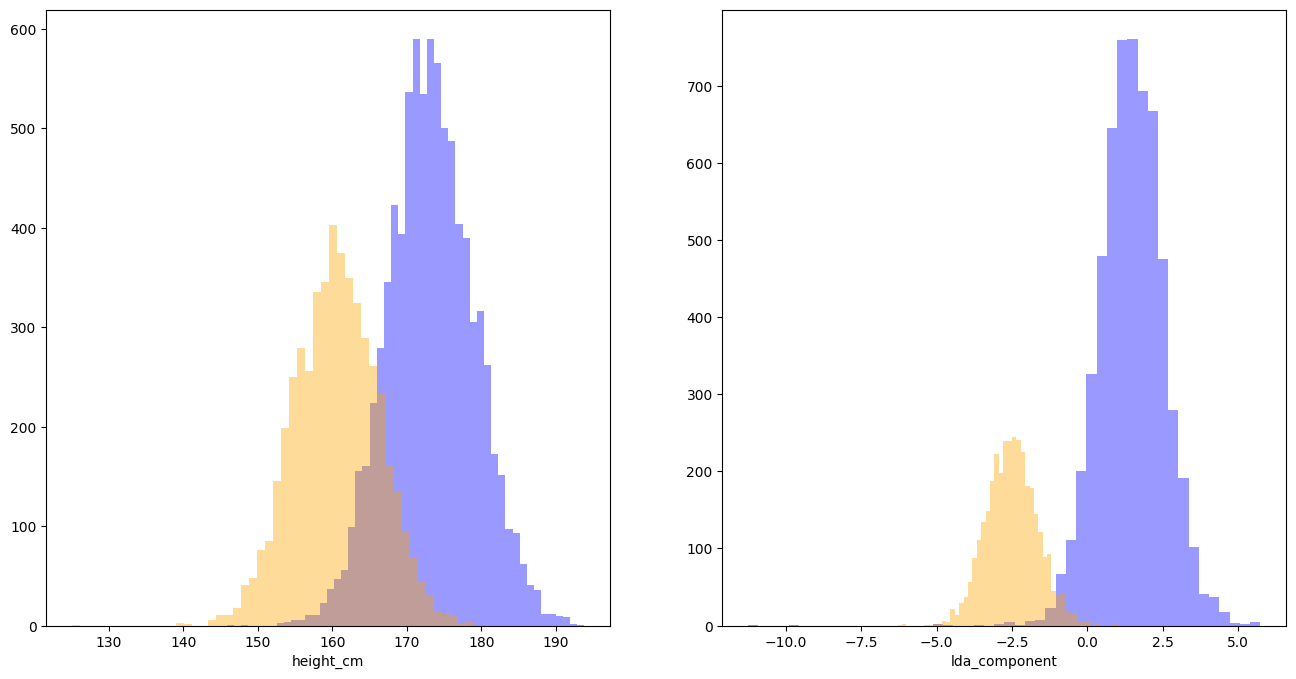

In [15]:
# 주성분 한 개로 설정
lda_com = LinearDiscriminantAnalysis(n_components=1)
lda_com.fit(x_train, y_train)
df_lda_com = lda_com.transform(x_train)
df_lda_component = pd.DataFrame(df_lda_com, columns=['lda_component'])

# 종속변수 데이터셋 인덱스 초기화 및 결합
y_train_index = y_train.reset_index()
df_lda_component['target'] = y_train_index['gender']

# 차원축소 요소 분별력 비교 시각화 설정
fig, axs = plt.subplots(figsize=(16,8), ncols=2, nrows=1)

# 키 요소의 분별력
sb.distplot(df.loc[df['gender']=='M', 'height_cm'], hist=True, kde=False, color='blue', label='man', ax=axs[0])
sb.distplot(df.loc[df['gender']=='F', 'height_cm'], hist=True, kde=False, color='orange', label='woman', ax=axs[0])

# 차원축소 주성분의 분별력
sb.distplot(df_lda_component.loc[df_lda_component['target']=='M', 'lda_component'], hist=True, kde=False, color='blue', label='man', ax=axs[1])
sb.distplot(df_lda_component.loc[df_lda_component['target']=='F', 'lda_component'], hist=True, kde=False, color='orange', label='woman', ax=axs[1])

> n_components = 1 옵션으로 9개의 독립변수를 하나의 차원으로 축소 

> 산출한 주성분이 실제 성별 구분을 잘하는지 확인하기 위해 기존의 키(height_cm) 변수와 주성분을 시각화하여 비교. 

> 왼쪽 : 키 변수는 남성과 여성이 중복되는 공간이 큰 반면, 오른쪽 : 주성부는 매우 적은 부분만 중복

9. 이차 판별분석 모델 적용

In [16]:
# 모델 생성
qda = QuadraticDiscriminantAnalysis(store_covariance=True)

# QDA 적합(훈련시키기)
qda.fit(x_train, y_train)

# 예측값
qda_y_train_pred= qda.predict(x_train)
qda_y_test_pred = qda.predict(x_test)

# 평가
print(accuracy_score(y_train, qda_y_train_pred))
print(accuracy_score(y_test, qda_y_test_pred))


0.98048
0.9798407167745147


c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> 선형 판별분석과 이차 판별분석의 분류 예측력이 유사하게 나옴

10. 이차 판별분석 모델 성능 리포트 출력

In [17]:
print(classification_report(y_test, qda_y_test_pred))

              precision    recall  f1-score   support

           F       0.97      0.97      0.97      1463
           M       0.98      0.98      0.98      2555

    accuracy                           0.98      4018
   macro avg       0.98      0.98      0.98      4018
weighted avg       0.98      0.98      0.98      4018

